## Import libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

## Transform OTU data

In [4]:
# dataset_list = ['bacteria_rarefied_otu_mapping_PKfixTrimmed', 'fungi_rarefied_otu_mapping_PKfix']
dataset_list = ['bacteria_genus', 'fungi_genus']

for dataset_name in dataset_list:
    df = pd.read_csv(f'{dataset_name}.csv')
    # drop the following columns: 'Domain', 'Habitat', 'Melanization'
    df = df.drop(['Domain', 'Habitat', 'Melanization', 'Sample_ID', 'Necrobag_ID', 'Incubation_time', 'Plot', 'Comp', 'unidentified'], axis=1)
    df_transformed = pd.DataFrame(PowerTransformer().fit_transform(df), columns=df.columns) 
    df_transformed.to_csv(f'./{dataset_name}_power_transformed.csv', index=False)
    # df.to_csv(f'./{dataset_name}_raw.csv', index=False)

## Plot Data Transformation Graph

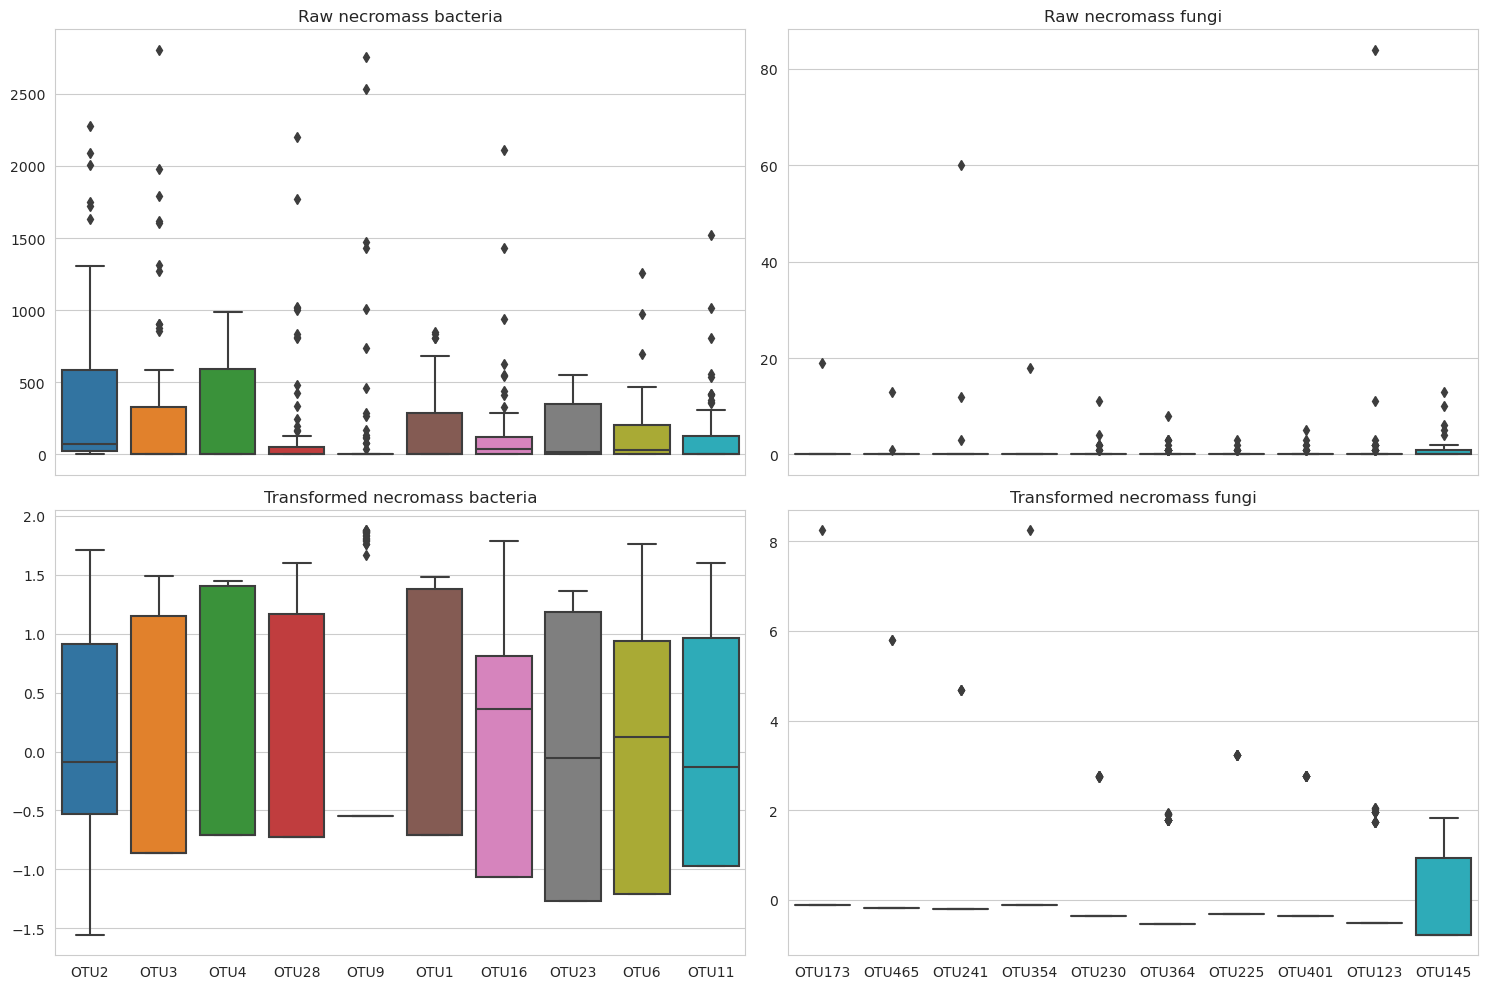

In [30]:
# Set the style and size of the plots
sns.set_style("whitegrid")

# Create four dataframes with some sample data
df_raw_bacteria = pd.read_csv('/projects/genomic-ml/da2343/ml_project_1/data/necromass/bacteria_rarefied_otu_mapping_PKfixTrimmed_raw.csv')
df_raw_bacteria = df_raw_bacteria.iloc[:, :10]

df_transformed_bacteria = pd.read_csv('/projects/genomic-ml/da2343/ml_project_1/data/necromass/bacteria_rarefied_otu_mapping_PKfixTrimmed_power_transformed.csv')
df_transformed_bacteria = df_transformed_bacteria.iloc[:, :10]

df_raw_fungi = pd.read_csv('/projects/genomic-ml/da2343/ml_project_1/data/necromass/fungi_rarefied_otu_mapping_PKfix_raw.csv')
df_raw_fungi = df_raw_fungi.iloc[:, :10]

df_transformed_fungi = pd.read_csv('/projects/genomic-ml/da2343/ml_project_1/data/necromass/fungi_rarefied_otu_mapping_PKfix_power_transformed.csv')
df_transformed_fungi = df_transformed_fungi.iloc[:, :10]

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2)

# increase the size of the plot
fig.set_size_inches(15, 10)

# Create a boxplot for each dataframe in each subplot
sns.boxplot(data=df_raw_bacteria, ax=axes[0, 0])
axes[0, 0].set_title("Raw necromass bacteria")

sns.boxplot(data=df_transformed_bacteria, ax=axes[1, 0])
axes[1, 0].set_title("Transformed necromass bacteria")

sns.boxplot(data=df_raw_fungi, ax=axes[0, 1])
axes[0, 1].set_title("Raw necromass fungi")

sns.boxplot(data=df_transformed_fungi, ax=axes[1, 1])
axes[1, 1].set_title("Transformed necromass fungi")

# Set the visibility of the x-axis ticks and labels for the top plot to False
plt.setp(axes[0, 0].get_xticklabels(), visible=False)
plt.setp(axes[0, 1].get_xticklabels(), visible=False)

# Adjust the spacing and layout of the subplots
plt.tight_layout()
plt.show()

# save the plot
fig.savefig('./necromass_data_dist_boxplots.png', dpi=1500)


## Combine the bacteria and fungi data

In [6]:
df_transformed_bacteria = pd.read_csv('/projects/genomic-ml/da2343/ml_project_1/data/necromass/bacteria_rarefied_otu_mapping_PKfixTrimmed_power_transformed.csv')

df_transformed_fungi = pd.read_csv('/projects/genomic-ml/da2343/ml_project_1/data/necromass/fungi_rarefied_otu_mapping_PKfix_power_transformed.csv')

df_transformed_bacteria_fungi = pd.concat([df_transformed_bacteria, df_transformed_fungi], axis=1)
df_transformed_bacteria_fungi.to_csv('/projects/genomic-ml/da2343/ml_project_1/data/necromass/bacteria_fungi_rarefied_otu_mapping_PKfixTrimmed_power_transformed.csv', index=False)

In [ ]:
df_transformed_bacteria.columns
# 1306
df_transformed_fungi.columns
# 457